In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline

In [2]:
filepath="Data/MHEALTHDATASET/mHealth_subject1.csv"

df_subject_1 = pd.read_csv(filepath)
df_subject_1.shape

(161280, 24)

In [3]:
df_subject_1.head()

,acc_chest_x,acc_chest_y,acc_chest_z,elect_sig_1,elect_sig_2,acc_left_ank_x,acc_left_ank_y,acc_left_ank_z,gyr_left_ank_x,gyr_left_ank_y,...,acc_right_arm_x,acc_right_arm_y,acc_right_arm_z,gyr_right_arm_x,gyr_right_arm_y,gyr_right_arm_z,mag_right_arm_x,mag_right_arm_y,mag_right_arm_z,label
0,-11.877,0.92101,2.08290,0.71586,0.51491,-3.4626,-13.474,-11.7710,-0.10946,-1.0206,...,-9.1756,6.4371,-0.29273,-0.67059,0.30595,-0.71552,2.6666,-2.6363,11.2710,0
1,-10.469,0.72051,3.33850,0.44793,0.19257,-11.9950,-12.994,-5.3217,-0.10390,-1.0263,...,-10.2170,6.4442,0.41596,-0.67059,0.30595,-0.71552,5.1705,-3.6007,8.0817,0
2,-11.525,-0.54029,5.13030,1.49450,0.71586,19.7520,-12.480,1.4902,-0.10390,-1.0263,...,-10.5450,6.2542,0.41688,-0.65882,0.31211,-0.69612,7.0909,-9.0455,9.9796,0
3,-13.352,-1.06830,1.55650,0.28885,0.23443,-21.4010,-19.105,15.2680,-0.10390,-1.0263,...,-9.4058,5.7760,-0.39870,-0.65882,0.31211,-0.69612,5.9307,-17.3420,14.0100,0
4,-13.063,-0.37903,-0.41306,0.87493,0.56934,5.3600,-19.347,-12.9350,-0.27829,-1.0056,...,-8.4421,7.0538,-1.61610,-0.65882,0.31211,-0.69612,2.7119,-16.0660,11.4060,0


In [4]:
# Get valid activities
activities_subject1 =df_subject_1.query('label!=0')
print(activities_subject1.shape)
activities_subject1.head()

(35174, 24)


,acc_chest_x,acc_chest_y,acc_chest_z,elect_sig_1,elect_sig_2,acc_left_ank_x,acc_left_ank_y,acc_left_ank_z,gyr_left_ank_x,gyr_left_ank_y,...,acc_right_arm_x,acc_right_arm_y,acc_right_arm_z,gyr_right_arm_x,gyr_right_arm_y,gyr_right_arm_z,mag_right_arm_x,mag_right_arm_y,mag_right_arm_z,label
3530,-9.8289,0.537270,2.1010,-0.121400,0.163270,2.4495,-9.7277,-0.493140,-0.25788,-0.83677,...,-1.6442,-9.8757,3.43330,-0.90784,-0.57290,0.084052,-3.3505,-11.89000,5.4671,8
3531,-10.0630,0.141760,2.0233,-0.192570,0.100470,1.7507,-9.7923,-0.024192,-0.25788,-0.83677,...,-2.5060,-9.7488,2.11670,-0.90784,-0.57290,0.084052,1.9181,-5.67690,-3.1540,8
3532,-9.6363,-0.002198,1.6945,-0.226060,0.020931,2.4836,-9.4641,0.124550,-0.25788,-0.83677,...,-2.6872,-9.9677,1.23080,-0.90784,-0.57290,0.084052,4.4654,-2.29000,-6.7470,8
3533,-9.5303,0.250110,1.8225,-0.159080,0.129770,2.5743,-9.3353,0.131890,-0.25788,-0.83677,...,-2.6247,-9.7028,0.72319,-0.90784,-0.57290,0.084052,6.4595,-0.37111,-12.5020,8
3534,-9.2791,0.317060,1.4391,-0.037677,0.267920,2.8298,-9.2048,0.307640,-0.28200,-0.84803,...,-2.7955,-9.2540,0.59980,-0.91176,-0.58522,0.101290,7.2062,2.48540,-16.4870,8


In [5]:
# group data by activity
def data_by_activity(X, y, activities):
    # group windows by activity
    grouped=list()
    #return {a:X[y[:,0]==a] for a in activities}
    for i in activities:
        ac = X[Y[:,0]==i]
        grouped.append(ac)
        #print(i,ac.shape)

def load_all_data(directory):
    # Load
    filename="mHealth_subject1.csv"
    df = pd.read_csv(directory+filename)
    df.insert(0, 'id', 1)


    for i in range(9):
        number=str(i+2)
        filename="mHealth_subject"+number+".csv"
    #   print(directory+filename)
        df_subject = pd.read_csv(directory+filename)
        df_subject.insert(0, 'id', i+2)
        df = df.append(df_subject)



    # Cleaning
    df =df.query('label != 0')
    raw = df
    
    # Separate data
    X = df.iloc[:, :24]
    Y = df.iloc[:,24]

    return raw,X,Y


def class_breakdown(data):
    # convert the numpy array into a dataframe
    df = pd.DataFrame(data)
    # group data by the class value and calculate the number of rows
    counts = df.groupby(0).size()
    # retrieve raw rows
    counts = counts.values
    # summarize
    for i in range(len(counts)):
        percent = counts[i] / len(df) * 100
        print('Class=%d, total=%d, percentage=%.3f' % (i + 1, counts[i], percent))


# Method to convert data to series
def to_series(data, off, activity_list, subject_id):
    subject_data = data.query('id==' + str(subject_id))
    series = [[]]
    for activity in activity_list:
        ser = np.asmatrix(subject_data.query("label=="+str(activity)).iloc[:, off]).T
        series=np.append(series,ser)
    return series
    

In [13]:
######## plots
def plot_histogram_by_activity(raw_data,activities,fields):
    xaxis = None
    plt.figure(figsize=(12,18))
    n=len(activities)
    for act in activities:
        activity_data = raw_data.query('label=='+str(act))
        normalized_df=(activity_data-activity_data.mean())/activity_data.std()
        for i in fields:
            ax = plt.subplot(n, 1, act, sharex = xaxis)
            ax.set_xlim(-1,1)
            if act==1:
                xaxis = ax
            plt.hist(normalized_df[i], bins=100)
            plt.title('activity '+str(act), y=0, loc='left')
    plt.show()

    
######## plots by subject
def plot_histogram_by_activity_subject(raw_data,activities,fields,subject_id):
    xaxis = None
    plt.figure(figsize=(12,18))
    n=len(activities)
    subject_data = raw_data.query('id==' + str(subject_id))
    
    for act in activities:
        activity_data = subject_data.query('label=='+str(act))
        normalized_df=(activity_data-activity_data.mean())/activity_data.std()
        for i in fields:
            ax = plt.subplot(n, 1, act, sharex = xaxis)
            ax.set_xlim(-1,1)
            if act==1:
                xaxis = ax
            plt.hist(normalized_df[i], bins=100)
            plt.title('activity '+str(act), y=0, loc='left')
    plt.show()

    
# Box plot of all data
def plot_activity_durations_by_subject(data, ids, activities):
    # enumerate subjects
    activity_windows = {a:list() for a in activities}
    for sub_id in ids:
        # get data for one subject
        data_by_subject=data.query("id=="+str(sub_id))
        # count windows by activity
        for a in activities:
            data_by_activity=data_by_subject.query("label=="+str(a))
            activity_windows[a].append(data_by_activity.shape[0])
    
    # organize durations into a list of lists
    durations = [activity_windows[a] for a in activities]
    plt.boxplot(durations, labels=activities)
    plt.show()
    
    
# Plot series by subject
def plot_series_by_subject(data, subject_id, activities):
    
    subject_data = data.query('id==' + str(subject_id))
    n = data.shape[1]
    off = 1 # chest position
    
    plt.figure(figsize=(12,18))

    # plot acc_chest
    for i in range(3):
        plt.subplot(n, 1, off)
        col = to_series(data, off, activities, subject_id)
        plt.plot(col)
        plt.title('chest acc ' + str(i), y=0, loc='left')
        off += 1
        
        
    off=6
    # plot acc_ankle
    for i in range(3):
        plt.subplot(n, 1, off-2)
        col = to_series(data, off, activities, subject_id)
        plt.plot(col)
        plt.title('ankle acc ' + str(i), y=0, loc='left')
        off += 1
    # plot gyr_ankle
    for i in range(3):
        plt.subplot(n, 1, off-2)
        col = to_series(data, off, activities, subject_id)
        plt.plot(col)
        plt.title('ankle gyr ' + str(i), y=0, loc='left')
        off += 1
    # plot mag_ankle
    for i in range(3):
        plt.subplot(n, 1, off-2)
        col = to_series(data, off, activities, subject_id)
        plt.plot(col)
        plt.title('ankle mag ' + str(i), y=0, loc='left')
        off += 1
        

    # plot acc_arm
    for i in range(3):
        plt.subplot(n, 1, off-2)
        col = to_series(data, off, activities, subject_id)
        plt.plot(col)
        plt.title('arm acc ' + str(i), y=0, loc='left')
        off += 1
    # plot gyr_arm
    for i in range(3):
        plt.subplot(n, 1, off-2)
        col = to_series(data, off, activities, subject_id)
        plt.plot(col)
        plt.title('arm gyr ' + str(i), y=0, loc='left')
        off += 1
    # plot mag_arm
    for i in range(3):
        plt.subplot(n, 1, off-2)
        col = to_series(data, off, activities, subject_id)
        plt.plot(col)
        plt.title('arm mag ' + str(i), y=0, loc='left')
        off += 1

        
    # plot activities
    plt.subplot(n, 1, 22)
    col = to_series(data, 24, activities, subject_id)
    plt.plot(col)
    plt.title('label', y=0, loc='left')
    plt.show()
    
    
    
# Plot series by subject
def plot_series_by_subject_act(data, subject_id, activities):
    
    subject_data = data.query('id==' + str(subject_id))
    n = data.shape[1]
    off = 1 # chest position
    
    plt.figure(figsize=(12,18))

    # plot acc_chest
    for i in range(3):
        plt.subplot(n, 1, off)
        col = to_series(data, off, activities, subject_id)
        plt.plot(col)
        plt.title('chest acc ' + str(i), y=0, loc='left')
        off += 1
        
        
    off=6
    # plot acc_ankle
    for i in range(3):
        plt.subplot(n, 1, off-2)
        col = to_series(data, off, activities, subject_id)
        plt.plot(col)
        plt.title('ankle acc ' + str(i), y=0, loc='left')
        off += 1
   
        

    # plot acc_arm
    for i in range(3):
        plt.subplot(n, 1, off-2)
        col = to_series(data, off, activities, subject_id)
        plt.plot(col)
        plt.title('arm acc ' + str(i), y=0, loc='left')
        off += 1


In [7]:
directory="Data/MHEALTHDATASET/"

raw,X,y=load_all_data(directory)
raw.head()

,id,acc_chest_x,acc_chest_y,acc_chest_z,elect_sig_1,elect_sig_2,acc_left_ank_x,acc_left_ank_y,acc_left_ank_z,gyr_left_ank_x,...,acc_right_arm_x,acc_right_arm_y,acc_right_arm_z,gyr_right_arm_x,gyr_right_arm_y,gyr_right_arm_z,mag_right_arm_x,mag_right_arm_y,mag_right_arm_z,label
3530,1,-9.8289,0.537270,2.1010,-0.121400,0.163270,2.4495,-9.7277,-0.493140,-0.25788,...,-1.6442,-9.8757,3.43330,-0.90784,-0.57290,0.084052,-3.3505,-11.89000,5.4671,8
3531,1,-10.0630,0.141760,2.0233,-0.192570,0.100470,1.7507,-9.7923,-0.024192,-0.25788,...,-2.5060,-9.7488,2.11670,-0.90784,-0.57290,0.084052,1.9181,-5.67690,-3.1540,8
3532,1,-9.6363,-0.002198,1.6945,-0.226060,0.020931,2.4836,-9.4641,0.124550,-0.25788,...,-2.6872,-9.9677,1.23080,-0.90784,-0.57290,0.084052,4.4654,-2.29000,-6.7470,8
3533,1,-9.5303,0.250110,1.8225,-0.159080,0.129770,2.5743,-9.3353,0.131890,-0.25788,...,-2.6247,-9.7028,0.72319,-0.90784,-0.57290,0.084052,6.4595,-0.37111,-12.5020,8
3534,1,-9.2791,0.317060,1.4391,-0.037677,0.267920,2.8298,-9.2048,0.307640,-0.28200,...,-2.7955,-9.2540,0.59980,-0.91176,-0.58522,0.101290,7.2062,2.48540,-16.4870,8


In [8]:
# Counting classes
matrix_y=np.asmatrix(y)
matrix_y=matrix_y.T

class_breakdown(matrix_y)

Class=1, total=30720, percentage=8.951
Class=2, total=30720, percentage=8.951
Class=3, total=30720, percentage=8.951
Class=4, total=30720, percentage=8.951
Class=5, total=30720, percentage=8.951
Class=6, total=28315, percentage=8.250
Class=7, total=29441, percentage=8.579
Class=8, total=29337, percentage=8.548
Class=9, total=30720, percentage=8.951
Class=10, total=30720, percentage=8.951
Class=11, total=30720, percentage=8.951
Class=12, total=10342, percentage=3.013


In [9]:
raw["label"].describe()

count    343195.000000
mean          6.169021
std           3.298902
min           1.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: label, dtype: float64

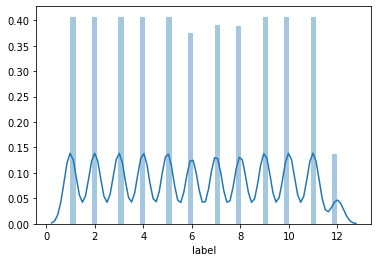

In [10]:
# Distribution by activity
sns.distplot(raw["label"])

In [11]:
activities=raw['label'].unique()
activities.sort()


data_id=raw['id'].unique()
data_id.sort()

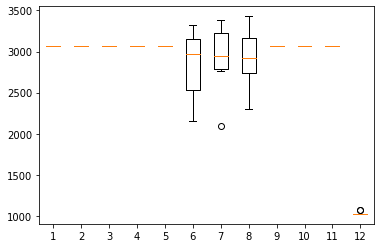

In [12]:
plot_activity_durations_by_subject(raw,data_id,activities)

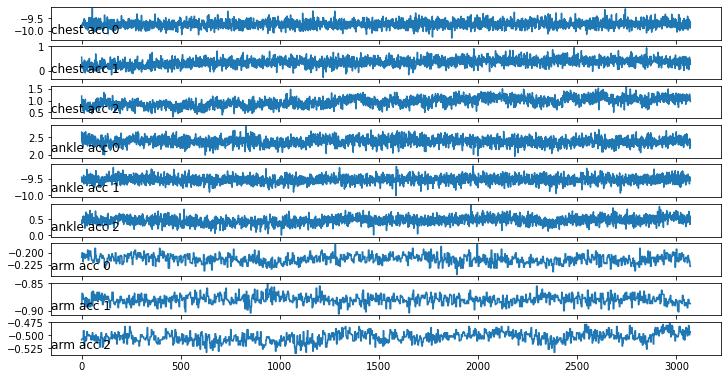

In [14]:
act_temp=[1]
plot_series_by_subject_act(raw,1,act_temp)

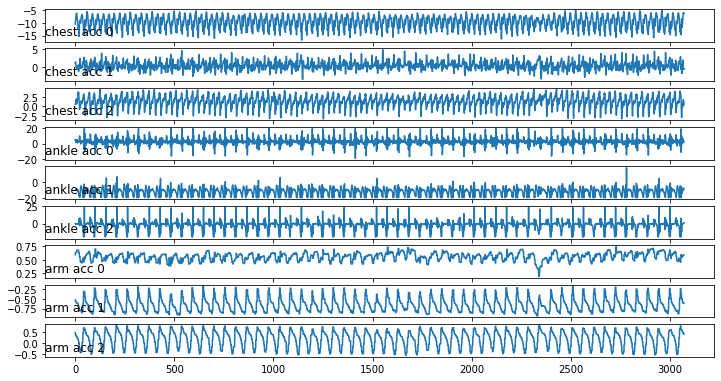

In [15]:
act_temp=[4]
plot_series_by_subject_act(raw,1,act_temp)

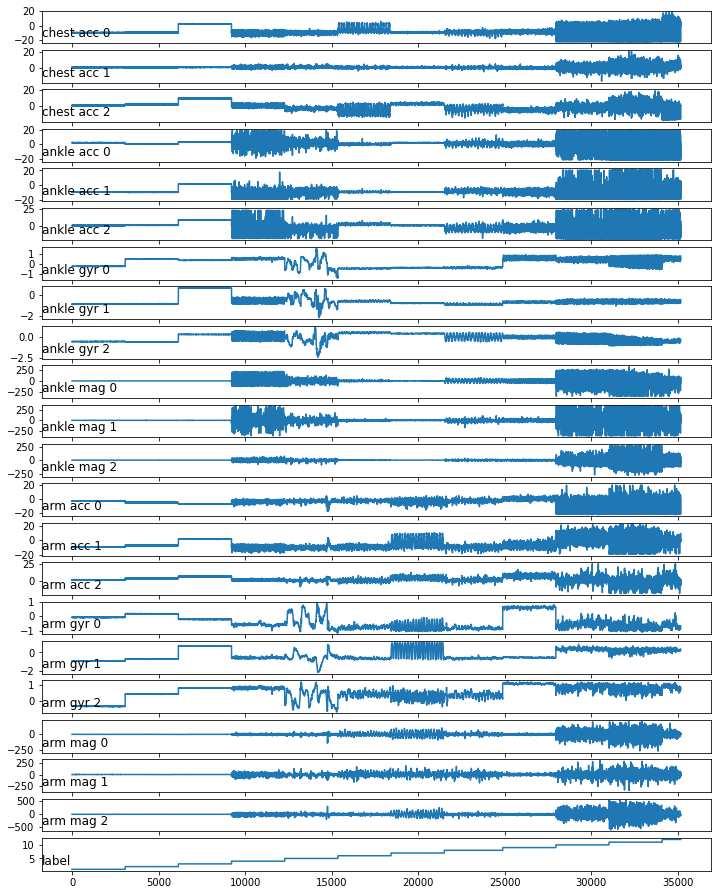

In [13]:
plot_series_by_subject(raw,1,activities)


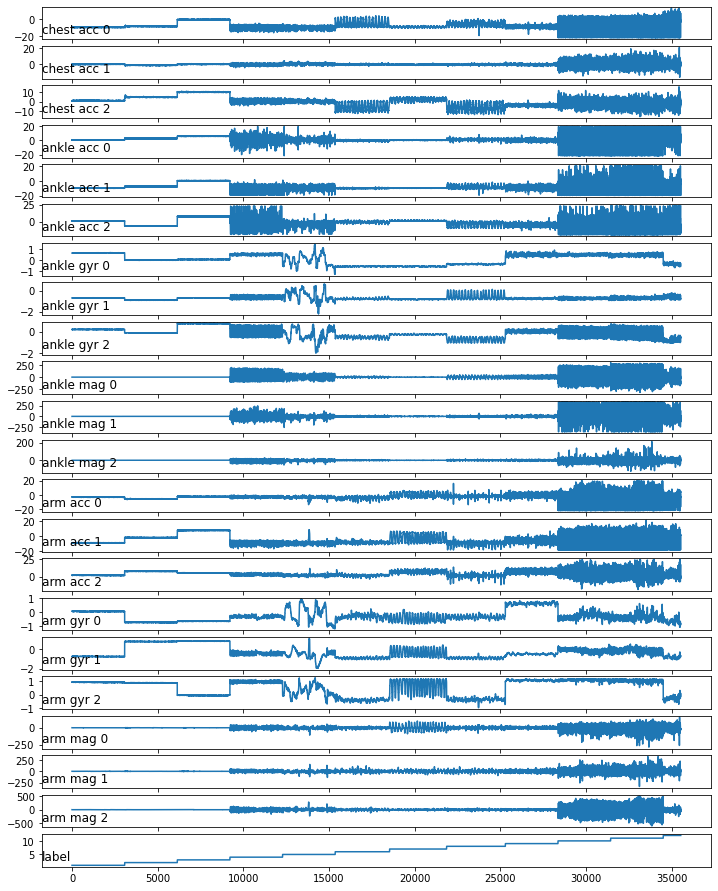

In [14]:
plot_series_by_subject(raw,2,activities)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


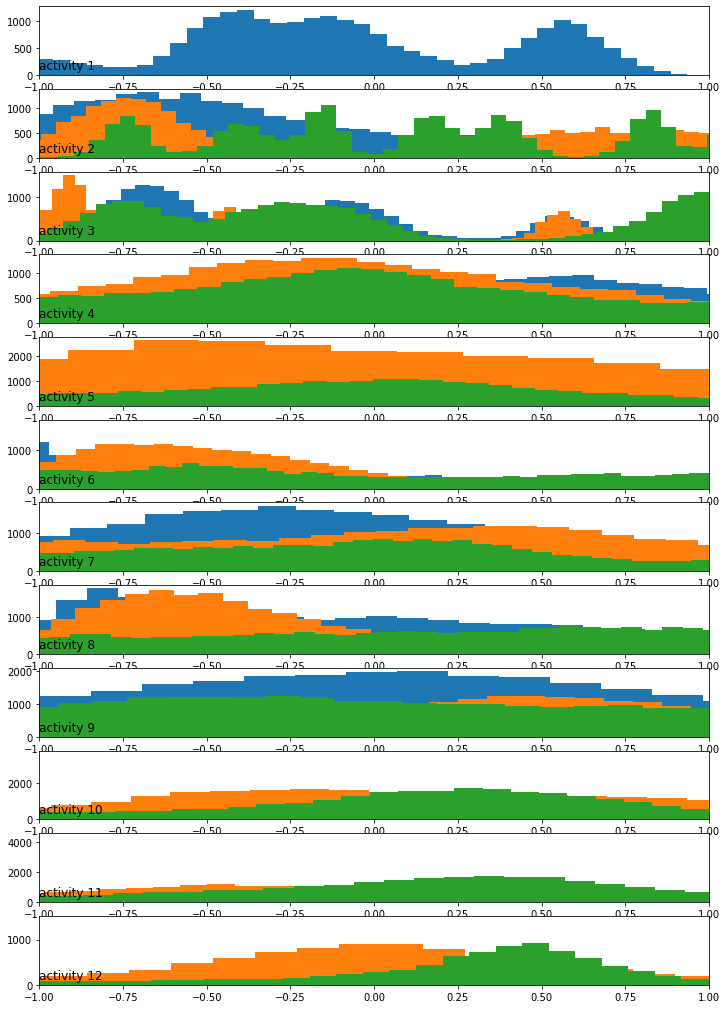

In [15]:
# Chest statistics by activity
chest_field=list()
chest_field.append("acc_chest_x")
chest_field.append("acc_chest_y")
chest_field.append("acc_chest_z")
plot_histogram_by_activity(raw,activities,chest_field)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


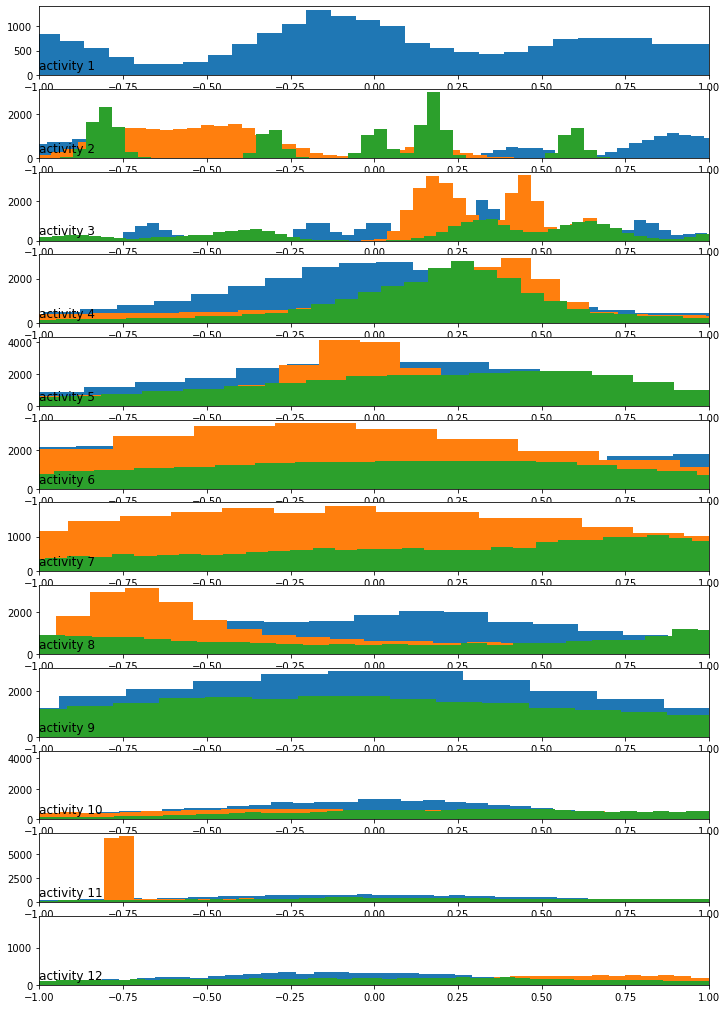

In [16]:
# ankle statistics by activity

left_ank=list()
left_ank.append("acc_left_ank_x")
left_ank.append("acc_left_ank_y")
left_ank.append("acc_left_ank_z")

plot_histogram_by_activity(raw,activities,left_ank)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


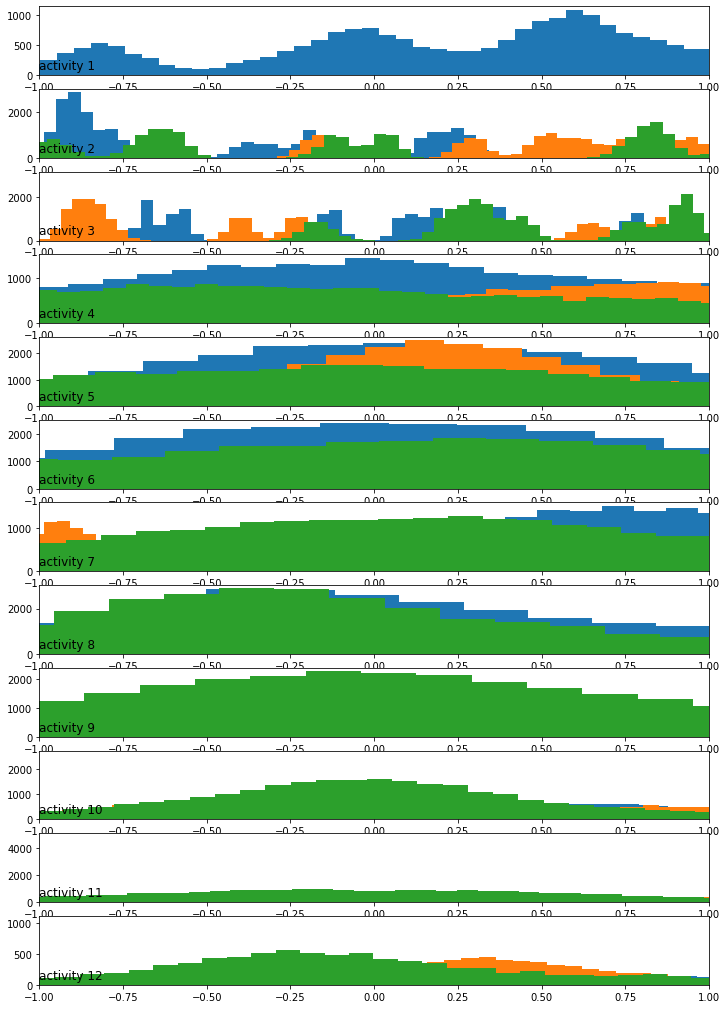

In [17]:
# arm statistics by activity

right_arm=list()
right_arm.append("acc_right_arm_x")
right_arm.append("acc_right_arm_y")
right_arm.append("acc_right_arm_z")

plot_histogram_by_activity(raw,activities,right_arm)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


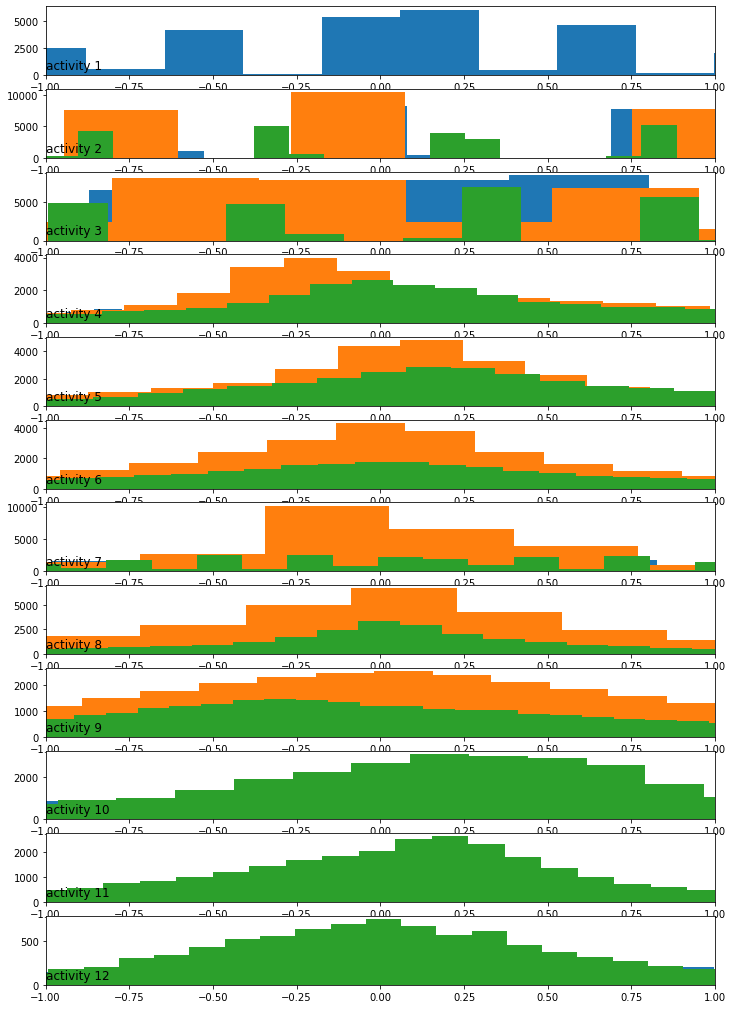

In [18]:
# ankle magnetometro statistics by activity
mag_ank=list()
mag_ank.append("mag_left_ank_x")
mag_ank.append("mag_left_ank_y")
mag_ank.append("mag_left_ank_z")

plot_histogram_by_activity(raw,activities,mag_ank)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


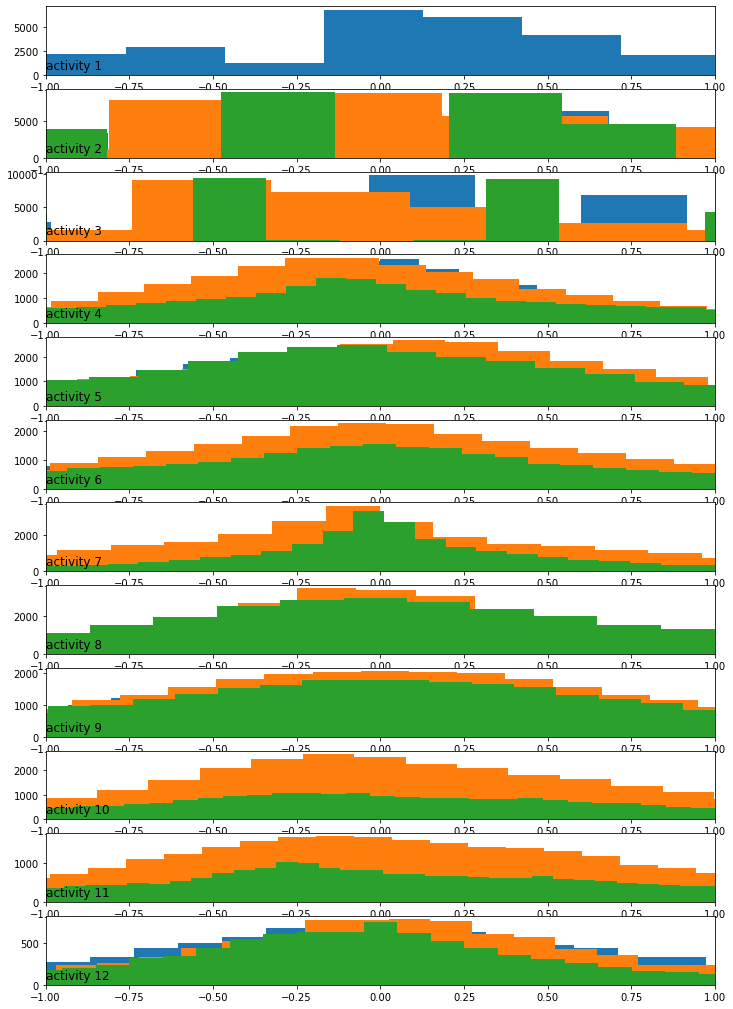

In [19]:
# ankle magnetometro statistics by activity
mag_right=list()
mag_right.append("mag_right_arm_x")
mag_right.append("mag_right_arm_y")
mag_right.append("mag_right_arm_z")

plot_histogram_by_activity(raw,activities,mag_right)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


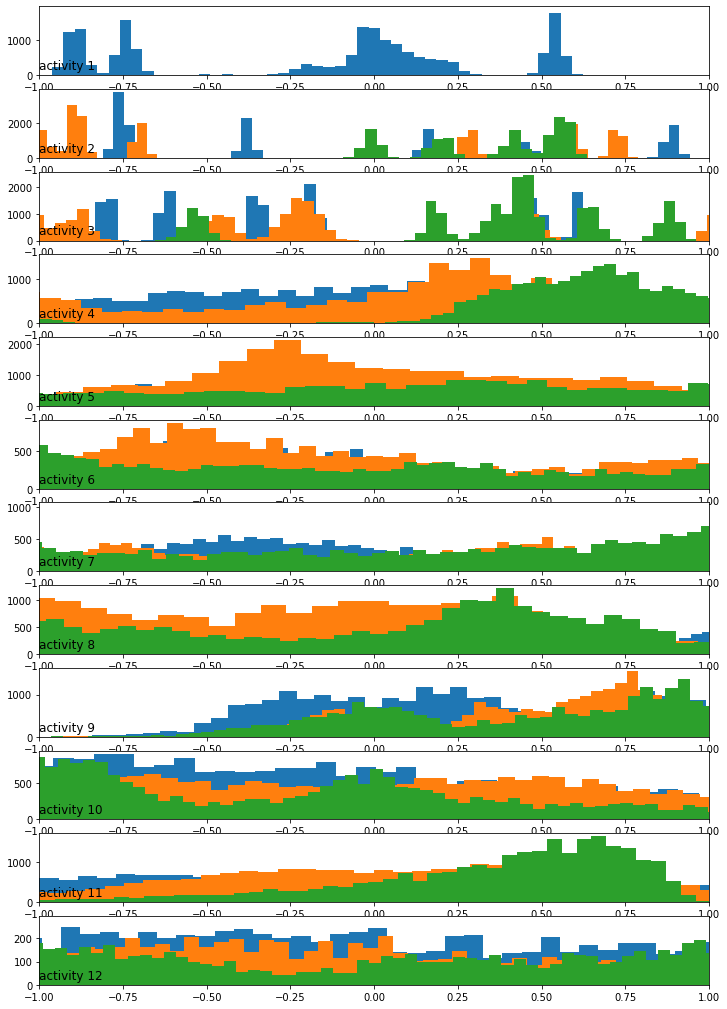

In [20]:
# arm statistics by activity

gyr_right_arm=list()
gyr_right_arm.append("gyr_right_arm_x")
gyr_right_arm.append("gyr_right_arm_y")
gyr_right_arm.append("gyr_right_arm_z")

plot_histogram_by_activity(raw,activities,gyr_right_arm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


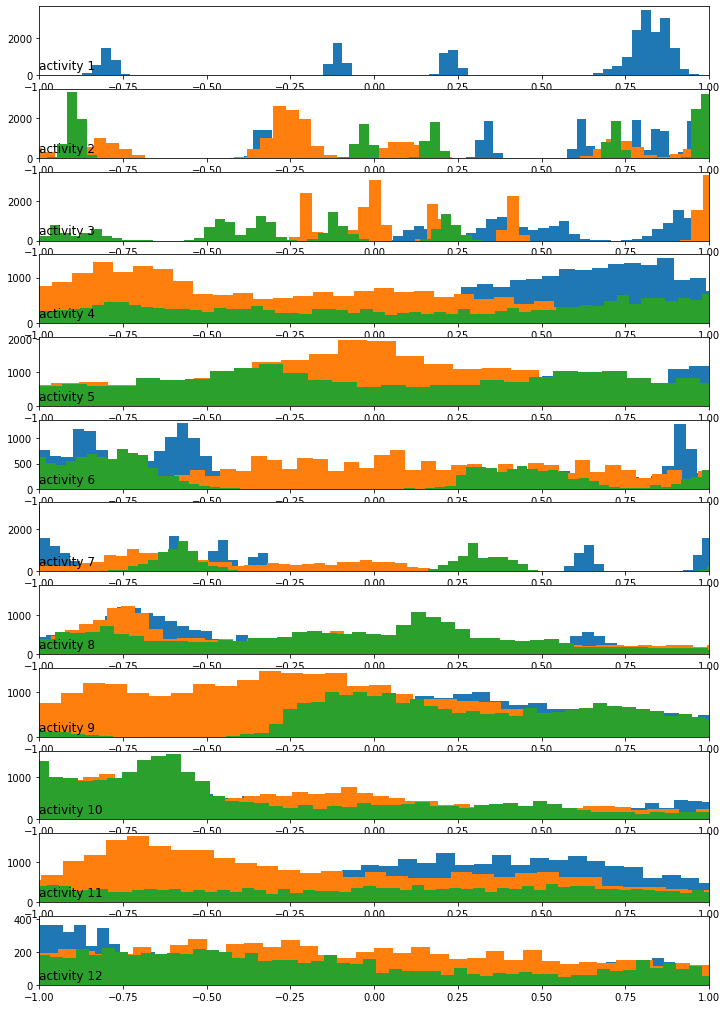

In [21]:
# arm statistics by activity

gyr_left_ank=list()
gyr_left_ank.append("gyr_left_ank_x")
gyr_left_ank.append("gyr_left_ank_y")
gyr_left_ank.append("gyr_left_ank_z")

plot_histogram_by_activity(raw,activities,gyr_left_ank)

# PCA

In [22]:
# PCA
# x_pca=X.iloc[:, 1:3]
# y_pca=raw.iloc[:,24]

subject_data = raw.query('id==' + str(1))

x_pca=subject_data.iloc[:, 6:8]
y_pca=subject_data.iloc[:,24]


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_pca)

print(principalComponents.shape)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.reset_index(drop=True, inplace=True)
y_pca.reset_index(drop=True, inplace=True)

finalDf = pd.concat([principalDf, y_pca], axis = 1,ignore_index=True)
finalDf.head(5)

(35174, 2)


,0,1,2
0,-0.933221,-0.968782,8
1,-0.960591,-0.267536,8
2,-0.671806,-1.016843,8
3,-0.548008,-1.114260,8
4,-0.431272,-1.376334,8


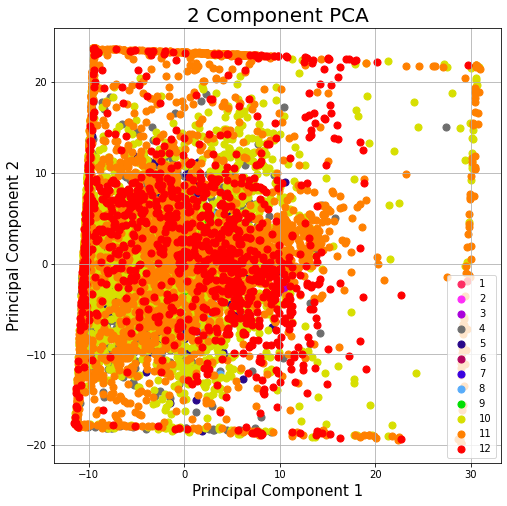

In [23]:


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = activities
colors = ['#FE2E64','#FE2EF7','#A901DB','#6E6E6E','#29088A','#B4045F',
          '#3A01DF','#58ACFA','#01DF01','#D7DF01','#FF8000','#FF0000']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[2] == target
    ax.scatter(finalDf.loc[indicesToKeep, 0]
               , finalDf.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



# T-SNE

In [11]:
import numpy as np
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns



def fit(X):
    n_samples = X.shape[0]
    
    # Compute euclidean distance
    distances = pairwise_distances(X, metric='euclidean', squared=True)
    
    # Compute joint probabilities p_ij from distances.
    P = _joint_probabilities(distances=distances, desired_perplexity=perplexity, verbose=False)
    
    # The embedding is initialized with iid samples from Gaussians with standard deviation 1e-4.
    X_embedded = 1e-4 * np.random.mtrand._rand.randn(n_samples, n_components).astype(np.float32)
    
    # degrees_of_freedom = n_components - 1 comes from
    # "Learning a Parametric Embedding by Preserving Local Structure"
    # Laurens van der Maaten, 2009.
    degrees_of_freedom = max(n_components - 1, 1)
    
    return _tsne(P, degrees_of_freedom, n_samples, X_embedded=X_embedded)

def _tsne(P, degrees_of_freedom, n_samples, X_embedded):
    params = X_embedded.ravel()
    
    obj_func = _kl_divergence
    
    params = _gradient_descent(obj_func, params, [P, degrees_of_freedom, n_samples, n_components])
        
    X_embedded = params.reshape(n_samples, n_components)
    return X_embedded


def _kl_divergence(params, P, degrees_of_freedom, n_samples, n_components):
    X_embedded = params.reshape(n_samples, n_components)
    
    dist = pdist(X_embedded, "sqeuclidean")
    dist /= degrees_of_freedom
    dist += 1.
    dist **= (degrees_of_freedom + 1.0) / -2.0
    Q = np.maximum(dist / (2.0 * np.sum(dist)), MACHINE_EPSILON)
    
    # Kullback-Leibler divergence of P and Q
    kl_divergence = 2.0 * np.dot(P, np.log(np.maximum(P, MACHINE_EPSILON) / Q))
    
    # Gradient: dC/dY
    grad = np.ndarray((n_samples, n_components), dtype=params.dtype)
    PQd = squareform((P - Q) * dist)
    for i in range(n_samples):
        grad[i] = np.dot(np.ravel(PQd[i], order='K'),
                         X_embedded[i] - X_embedded)
    grad = grad.ravel()
    c = 2.0 * (degrees_of_freedom + 1.0) / degrees_of_freedom
    grad *= c
    return kl_divergence, grad
    
def _gradient_descent(obj_func, p0, args, it=0, n_iter=1000,
                      n_iter_check=1, n_iter_without_progress=300,
                      momentum=0.8, learning_rate=200.0, min_gain=0.01,
                      min_grad_norm=1e-7):
    
    p = p0.copy().ravel()
    update = np.zeros_like(p)
    gains = np.ones_like(p)
    error = np.finfo(np.float).max
    best_error = np.finfo(np.float).max
    best_iter = i = it
    
    for i in range(it, n_iter):
        error, grad = obj_func(p, *args)
        grad_norm = linalg.norm(grad)
        inc = update * grad < 0.0
        dec = np.invert(inc)
        gains[inc] += 0.2
        gains[dec] *= 0.8
        np.clip(gains, min_gain, np.inf, out=gains)
        grad *= gains
        update = momentum * update - learning_rate * grad
        p += update
#         print("[t-SNE] Iteration %d: error = %.7f,"
#                       " gradient norm = %.7f"
#                       % (i + 1, error, grad_norm))
        
        if error < best_error:
                best_error = error
                best_iter = i
        elif i - best_iter > n_iter_without_progress:
            break
        
        if grad_norm <= min_grad_norm:
            break
    
    return p

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 12)


subject_data = raw.query('id==' + str(1))

x_pca=subject_data.iloc[:, 1:3]
y_pca=subject_data.iloc[:,24]



row,col=subject_data.shape

x_tsne = np.zeros((1,col))

for i in range(12):
    no=str(i+1)
    x_temp = subject_data.query('label=='+no)
    x_tsne = np.concatenate((x_tsne,x_temp.iloc[0:200, :]))


x_tsne=np.delete(x_tsne,0,0)
    
print(x_tsne.shape)
y_temp=x_tsne[:,24]

MACHINE_EPSILON = np.finfo(np.double).eps
n_components = 2
perplexity = 30

X_embedded = fit(x_tsne)






(2400, 25)


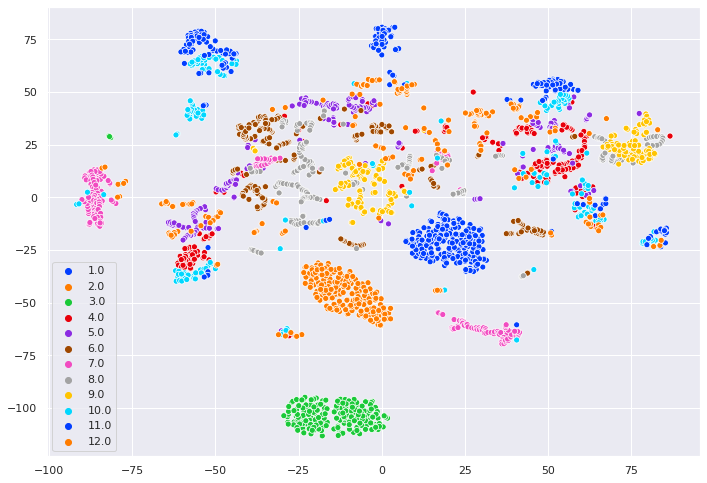

In [13]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_temp, legend='full',palette=palette)

(2400, 9)
[t-SNE] Iteration 1: error = 4.2487048, gradient norm = 0.0000035
[t-SNE] Iteration 2: error = 4.2487048, gradient norm = 0.0000036
[t-SNE] Iteration 3: error = 4.2487048, gradient norm = 0.0000042
[t-SNE] Iteration 4: error = 4.2487048, gradient norm = 0.0000058
[t-SNE] Iteration 5: error = 4.2487048, gradient norm = 0.0000090
[t-SNE] Iteration 6: error = 4.2487047, gradient norm = 0.0000149
[t-SNE] Iteration 7: error = 4.2487046, gradient norm = 0.0000262
[t-SNE] Iteration 8: error = 4.2487039, gradient norm = 0.0000487
[t-SNE] Iteration 9: error = 4.2487014, gradient norm = 0.0000946
[t-SNE] Iteration 10: error = 4.2486913, gradient norm = 0.0001923
[t-SNE] Iteration 11: error = 4.2486455, gradient norm = 0.0004075
[t-SNE] Iteration 12: error = 4.2484233, gradient norm = 0.0008968
[t-SNE] Iteration 13: error = 4.2472655, gradient norm = 0.0020374
[t-SNE] Iteration 14: error = 4.2409219, gradient norm = 0.0046750
[t-SNE] Iteration 15: error = 4.2071491, gradient norm = 0.00

[t-SNE] Iteration 124: error = 1.0189435, gradient norm = 0.0004796
[t-SNE] Iteration 125: error = 1.0166991, gradient norm = 0.0004451
[t-SNE] Iteration 126: error = 1.0144848, gradient norm = 0.0004244
[t-SNE] Iteration 127: error = 1.0122995, gradient norm = 0.0004333
[t-SNE] Iteration 128: error = 1.0101321, gradient norm = 0.0004138
[t-SNE] Iteration 129: error = 1.0079878, gradient norm = 0.0004119
[t-SNE] Iteration 130: error = 1.0058615, gradient norm = 0.0004049
[t-SNE] Iteration 131: error = 1.0037555, gradient norm = 0.0004079
[t-SNE] Iteration 132: error = 1.0016793, gradient norm = 0.0003959
[t-SNE] Iteration 133: error = 0.9996558, gradient norm = 0.0003947
[t-SNE] Iteration 134: error = 0.9976659, gradient norm = 0.0003878
[t-SNE] Iteration 135: error = 0.9956999, gradient norm = 0.0003792
[t-SNE] Iteration 136: error = 0.9937634, gradient norm = 0.0003604
[t-SNE] Iteration 137: error = 0.9918672, gradient norm = 0.0003568
[t-SNE] Iteration 138: error = 0.9900033, gradie

[t-SNE] Iteration 246: error = 0.8403091, gradient norm = 0.0004049
[t-SNE] Iteration 247: error = 0.8395363, gradient norm = 0.0003531
[t-SNE] Iteration 248: error = 0.8388016, gradient norm = 0.0003501
[t-SNE] Iteration 249: error = 0.8380701, gradient norm = 0.0003356
[t-SNE] Iteration 250: error = 0.8373423, gradient norm = 0.0003089
[t-SNE] Iteration 251: error = 0.8366409, gradient norm = 0.0002998
[t-SNE] Iteration 252: error = 0.8359590, gradient norm = 0.0002942
[t-SNE] Iteration 253: error = 0.8352820, gradient norm = 0.0002944
[t-SNE] Iteration 254: error = 0.8346126, gradient norm = 0.0002792
[t-SNE] Iteration 255: error = 0.8339590, gradient norm = 0.0002958
[t-SNE] Iteration 256: error = 0.8333147, gradient norm = 0.0003150
[t-SNE] Iteration 257: error = 0.8326749, gradient norm = 0.0003233
[t-SNE] Iteration 258: error = 0.8320362, gradient norm = 0.0002745
[t-SNE] Iteration 259: error = 0.8314050, gradient norm = 0.0002562
[t-SNE] Iteration 260: error = 0.8307798, gradie

[t-SNE] Iteration 367: error = 0.7828139, gradient norm = 0.0001940
[t-SNE] Iteration 368: error = 0.7824494, gradient norm = 0.0001891
[t-SNE] Iteration 369: error = 0.7820965, gradient norm = 0.0001913
[t-SNE] Iteration 370: error = 0.7817505, gradient norm = 0.0001949
[t-SNE] Iteration 371: error = 0.7814069, gradient norm = 0.0001954
[t-SNE] Iteration 372: error = 0.7810638, gradient norm = 0.0001918
[t-SNE] Iteration 373: error = 0.7807210, gradient norm = 0.0001874
[t-SNE] Iteration 374: error = 0.7803803, gradient norm = 0.0001945
[t-SNE] Iteration 375: error = 0.7800436, gradient norm = 0.0002247
[t-SNE] Iteration 376: error = 0.7797107, gradient norm = 0.0002604
[t-SNE] Iteration 377: error = 0.7793755, gradient norm = 0.0002302
[t-SNE] Iteration 378: error = 0.7790395, gradient norm = 0.0001548
[t-SNE] Iteration 379: error = 0.7787124, gradient norm = 0.0002228
[t-SNE] Iteration 380: error = 0.7783761, gradient norm = 0.0001588
[t-SNE] Iteration 381: error = 0.7780433, gradie

[t-SNE] Iteration 489: error = 0.7418609, gradient norm = 0.0001034
[t-SNE] Iteration 490: error = 0.7417500, gradient norm = 0.0001041
[t-SNE] Iteration 491: error = 0.7416394, gradient norm = 0.0000988
[t-SNE] Iteration 492: error = 0.7415297, gradient norm = 0.0000940
[t-SNE] Iteration 493: error = 0.7414209, gradient norm = 0.0000940
[t-SNE] Iteration 494: error = 0.7413132, gradient norm = 0.0000944
[t-SNE] Iteration 495: error = 0.7412064, gradient norm = 0.0000948
[t-SNE] Iteration 496: error = 0.7411003, gradient norm = 0.0000951
[t-SNE] Iteration 497: error = 0.7409951, gradient norm = 0.0000997
[t-SNE] Iteration 498: error = 0.7408903, gradient norm = 0.0001011
[t-SNE] Iteration 499: error = 0.7407858, gradient norm = 0.0000931
[t-SNE] Iteration 500: error = 0.7406821, gradient norm = 0.0000865
[t-SNE] Iteration 501: error = 0.7405793, gradient norm = 0.0000917
[t-SNE] Iteration 502: error = 0.7404767, gradient norm = 0.0000839
[t-SNE] Iteration 503: error = 0.7403749, gradie

[t-SNE] Iteration 610: error = 0.7312246, gradient norm = 0.0000634
[t-SNE] Iteration 611: error = 0.7311639, gradient norm = 0.0000652
[t-SNE] Iteration 612: error = 0.7311034, gradient norm = 0.0000684
[t-SNE] Iteration 613: error = 0.7310429, gradient norm = 0.0000690
[t-SNE] Iteration 614: error = 0.7309825, gradient norm = 0.0000635
[t-SNE] Iteration 615: error = 0.7309224, gradient norm = 0.0000631
[t-SNE] Iteration 616: error = 0.7308626, gradient norm = 0.0000659
[t-SNE] Iteration 617: error = 0.7308028, gradient norm = 0.0000583
[t-SNE] Iteration 618: error = 0.7307435, gradient norm = 0.0000560
[t-SNE] Iteration 619: error = 0.7306846, gradient norm = 0.0000602
[t-SNE] Iteration 620: error = 0.7306258, gradient norm = 0.0000582
[t-SNE] Iteration 621: error = 0.7305673, gradient norm = 0.0000572
[t-SNE] Iteration 622: error = 0.7305091, gradient norm = 0.0000564
[t-SNE] Iteration 623: error = 0.7304511, gradient norm = 0.0000552
[t-SNE] Iteration 624: error = 0.7303934, gradie

[t-SNE] Iteration 732: error = 0.7250800, gradient norm = 0.0000473
[t-SNE] Iteration 733: error = 0.7250381, gradient norm = 0.0000419
[t-SNE] Iteration 734: error = 0.7249965, gradient norm = 0.0000463
[t-SNE] Iteration 735: error = 0.7249549, gradient norm = 0.0000419
[t-SNE] Iteration 736: error = 0.7249135, gradient norm = 0.0000419
[t-SNE] Iteration 737: error = 0.7248723, gradient norm = 0.0000442
[t-SNE] Iteration 738: error = 0.7248311, gradient norm = 0.0000451
[t-SNE] Iteration 739: error = 0.7247902, gradient norm = 0.0000549
[t-SNE] Iteration 740: error = 0.7247495, gradient norm = 0.0000578
[t-SNE] Iteration 741: error = 0.7247086, gradient norm = 0.0000502
[t-SNE] Iteration 742: error = 0.7246679, gradient norm = 0.0000415
[t-SNE] Iteration 743: error = 0.7246276, gradient norm = 0.0000462
[t-SNE] Iteration 744: error = 0.7245873, gradient norm = 0.0000493
[t-SNE] Iteration 745: error = 0.7245471, gradient norm = 0.0000400
[t-SNE] Iteration 746: error = 0.7245072, gradie

[t-SNE] Iteration 854: error = 0.7205046, gradient norm = 0.0000391
[t-SNE] Iteration 855: error = 0.7204716, gradient norm = 0.0000364
[t-SNE] Iteration 856: error = 0.7204388, gradient norm = 0.0000388
[t-SNE] Iteration 857: error = 0.7204061, gradient norm = 0.0000392
[t-SNE] Iteration 858: error = 0.7203735, gradient norm = 0.0000391
[t-SNE] Iteration 859: error = 0.7203410, gradient norm = 0.0000377
[t-SNE] Iteration 860: error = 0.7203086, gradient norm = 0.0000394
[t-SNE] Iteration 861: error = 0.7202763, gradient norm = 0.0000390
[t-SNE] Iteration 862: error = 0.7202441, gradient norm = 0.0000385
[t-SNE] Iteration 863: error = 0.7202119, gradient norm = 0.0000363
[t-SNE] Iteration 864: error = 0.7201800, gradient norm = 0.0000359
[t-SNE] Iteration 865: error = 0.7201481, gradient norm = 0.0000362
[t-SNE] Iteration 866: error = 0.7201163, gradient norm = 0.0000356
[t-SNE] Iteration 867: error = 0.7200845, gradient norm = 0.0000357
[t-SNE] Iteration 868: error = 0.7200528, gradie

[t-SNE] Iteration 975: error = 0.7168027, gradient norm = 0.0000636
[t-SNE] Iteration 976: error = 0.7167699, gradient norm = 0.0000729
[t-SNE] Iteration 977: error = 0.7167364, gradient norm = 0.0000556
[t-SNE] Iteration 978: error = 0.7167028, gradient norm = 0.0000360
[t-SNE] Iteration 979: error = 0.7166697, gradient norm = 0.0000539
[t-SNE] Iteration 980: error = 0.7166361, gradient norm = 0.0000507
[t-SNE] Iteration 981: error = 0.7166022, gradient norm = 0.0000371
[t-SNE] Iteration 982: error = 0.7165684, gradient norm = 0.0000499
[t-SNE] Iteration 983: error = 0.7165341, gradient norm = 0.0000386
[t-SNE] Iteration 984: error = 0.7164998, gradient norm = 0.0000411
[t-SNE] Iteration 985: error = 0.7164652, gradient norm = 0.0000423
[t-SNE] Iteration 986: error = 0.7164303, gradient norm = 0.0000405
[t-SNE] Iteration 987: error = 0.7163952, gradient norm = 0.0000424
[t-SNE] Iteration 988: error = 0.7163598, gradient norm = 0.0000443
[t-SNE] Iteration 989: error = 0.7163241, gradie

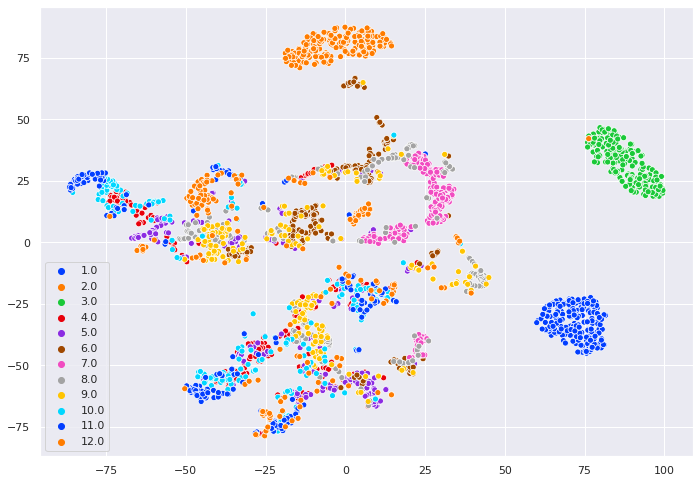

In [70]:
# Chest data

chest_x_tsne=x_tsne[:,6:15]
y_temp=x_tsne[:,24]

print(chest_x_tsne.shape)

MACHINE_EPSILON = np.finfo(np.double).eps
n_components = 2
perplexity = 30

X_embedded = fit(chest_x_tsne)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_temp, legend='full',palette=palette)